In [234]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [235]:
df = pd.read_json('data/concatenated_data.json')

In [236]:
df.head()

,Jaar,Kwartaal,BedrijfskenmerkenSBI2008,Ziekteverzuimpercentage_1,BeloningVanWerknemers_1,...,Mannen_28,Vrouwen_29,Totaal_30,Mannen_31,Vrouwen_32
0,2016,1,"A Landbouw, bosbouw en visserij",2.7,689.0,...,67.0,33.0,2.4,1.7,3.8
1,2016,1,B Delfstoffenwinning,3.6,NaN,...,NaN,NaN,NaN,NaN,NaN
2,2016,1,C Industrie,5.5,9022.0,...,504.0,132.0,1.1,0.9,1.9
3,2016,1,D Energievoorziening,4.9,NaN,...,NaN,NaN,NaN,NaN,NaN
4,2016,1,E Waterbedrijven en afvalbeheer,5.5,NaN,...,NaN,NaN,NaN,NaN,NaN


In [237]:
df.info(verbose=True, show_counts=True) #verbose is true because it otherwise doesn't output the entire list of columns

<class 'pandas.core.frame.DataFrame'>
Index: 456 entries, 0 to 455
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Jaar                                 456 non-null    int64  
 1   Kwartaal                             456 non-null    int64  
 2   BedrijfskenmerkenSBI2008             456 non-null    object 
 3   Ziekteverzuimpercentage_1            456 non-null    float64
 4   BeloningVanWerknemers_1              216 non-null    float64
 5   BeloningSeizoengecorrigeerd_2        216 non-null    float64
 6   Lonen_3                              216 non-null    float64
 7   LonenSeizoengecorrigeerd_4           216 non-null    float64
 8   SocialePremiesTLVWerkgevers_5        216 non-null    float64
 9   SocialePremiesSeizoengecorrigeerd_6  216 non-null    float64
 10  Loonkosten_7                         216 non-null    float64
 11  BeloningVanWerknemers_8              

## Ziekteverzuim

count    456.000000
mean       4.061404
std        1.105114
min        2.000000
25%        3.200000
50%        3.900000
75%        4.900000
max        7.500000
Name: Ziekteverzuimpercentage_1, dtype: float64


<Figure size 900x800 with 0 Axes>

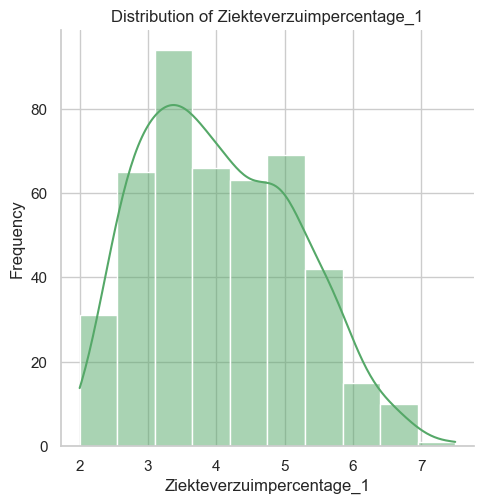

In [238]:
# Print the description of the Ziekteverzuimpercentage_1 column
print(df['Ziekteverzuimpercentage_1'].describe())

# Plot the distribution with seaborn
plt.figure(figsize=(9, 8))
sns.displot(df['Ziekteverzuimpercentage_1'], color='g', bins=10, kde=True)
plt.title('Distribution of Ziekteverzuimpercentage_1')
plt.xlabel('Ziekteverzuimpercentage_1')
plt.ylabel('Frequency')
plt.show()

/var/folders/7z/7m1pst117r9bgm5pljhtkd0r0000gn/T/ipykernel_60340/4264157143.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


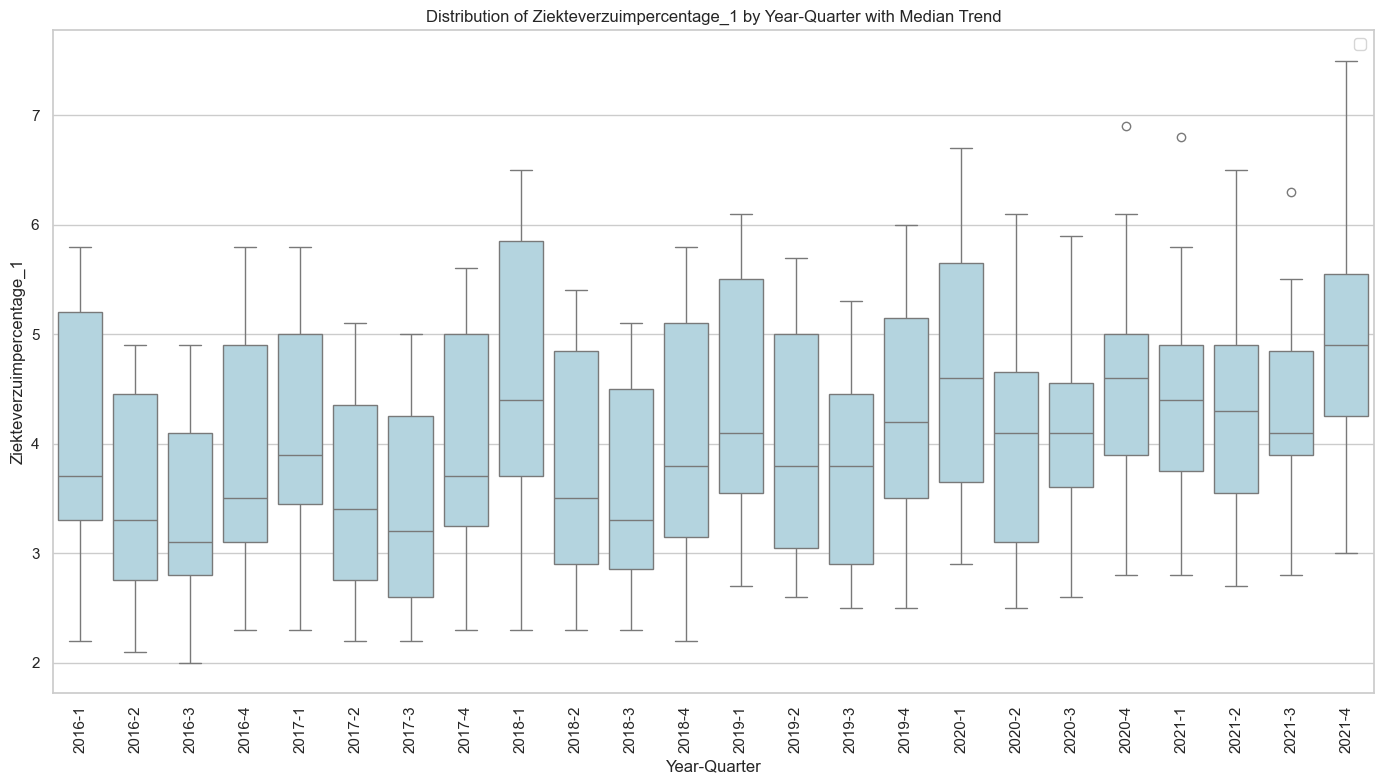

In [239]:
# Create 'Year-Quarter' column
df['Year-Quarter'] = df['Jaar'].astype(str) + '-' + df['Kwartaal'].astype(str)

# Plot the data
plt.figure(figsize=(14, 8))

# Boxplot
sns.boxplot(data=df, x='Year-Quarter', y='Ziekteverzuimpercentage_1', color='lightblue')

# Adding labels and title
plt.title('Distribution of Ziekteverzuimpercentage_1 by Year-Quarter with Median Trend')
plt.xlabel('Year-Quarter')
plt.ylabel('Ziekteverzuimpercentage_1')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.legend()
plt.show()

## Numerical data distribution

In [240]:
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('float64'), dtype('int64')]

In [241]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Jaar,Kwartaal,Ziekteverzuimpercentage_1,BeloningVanWerknemers_1,BeloningSeizoengecorrigeerd_2,...,Mannen_28,Vrouwen_29,Totaal_30,Mannen_31,Vrouwen_32
0,2016,1,2.7,689.0,770.0,...,67.0,33.0,2.4,1.7,3.8
1,2016,1,3.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
2,2016,1,5.5,9022.0,9320.0,...,504.0,132.0,1.1,0.9,1.9
3,2016,1,4.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
4,2016,1,5.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN


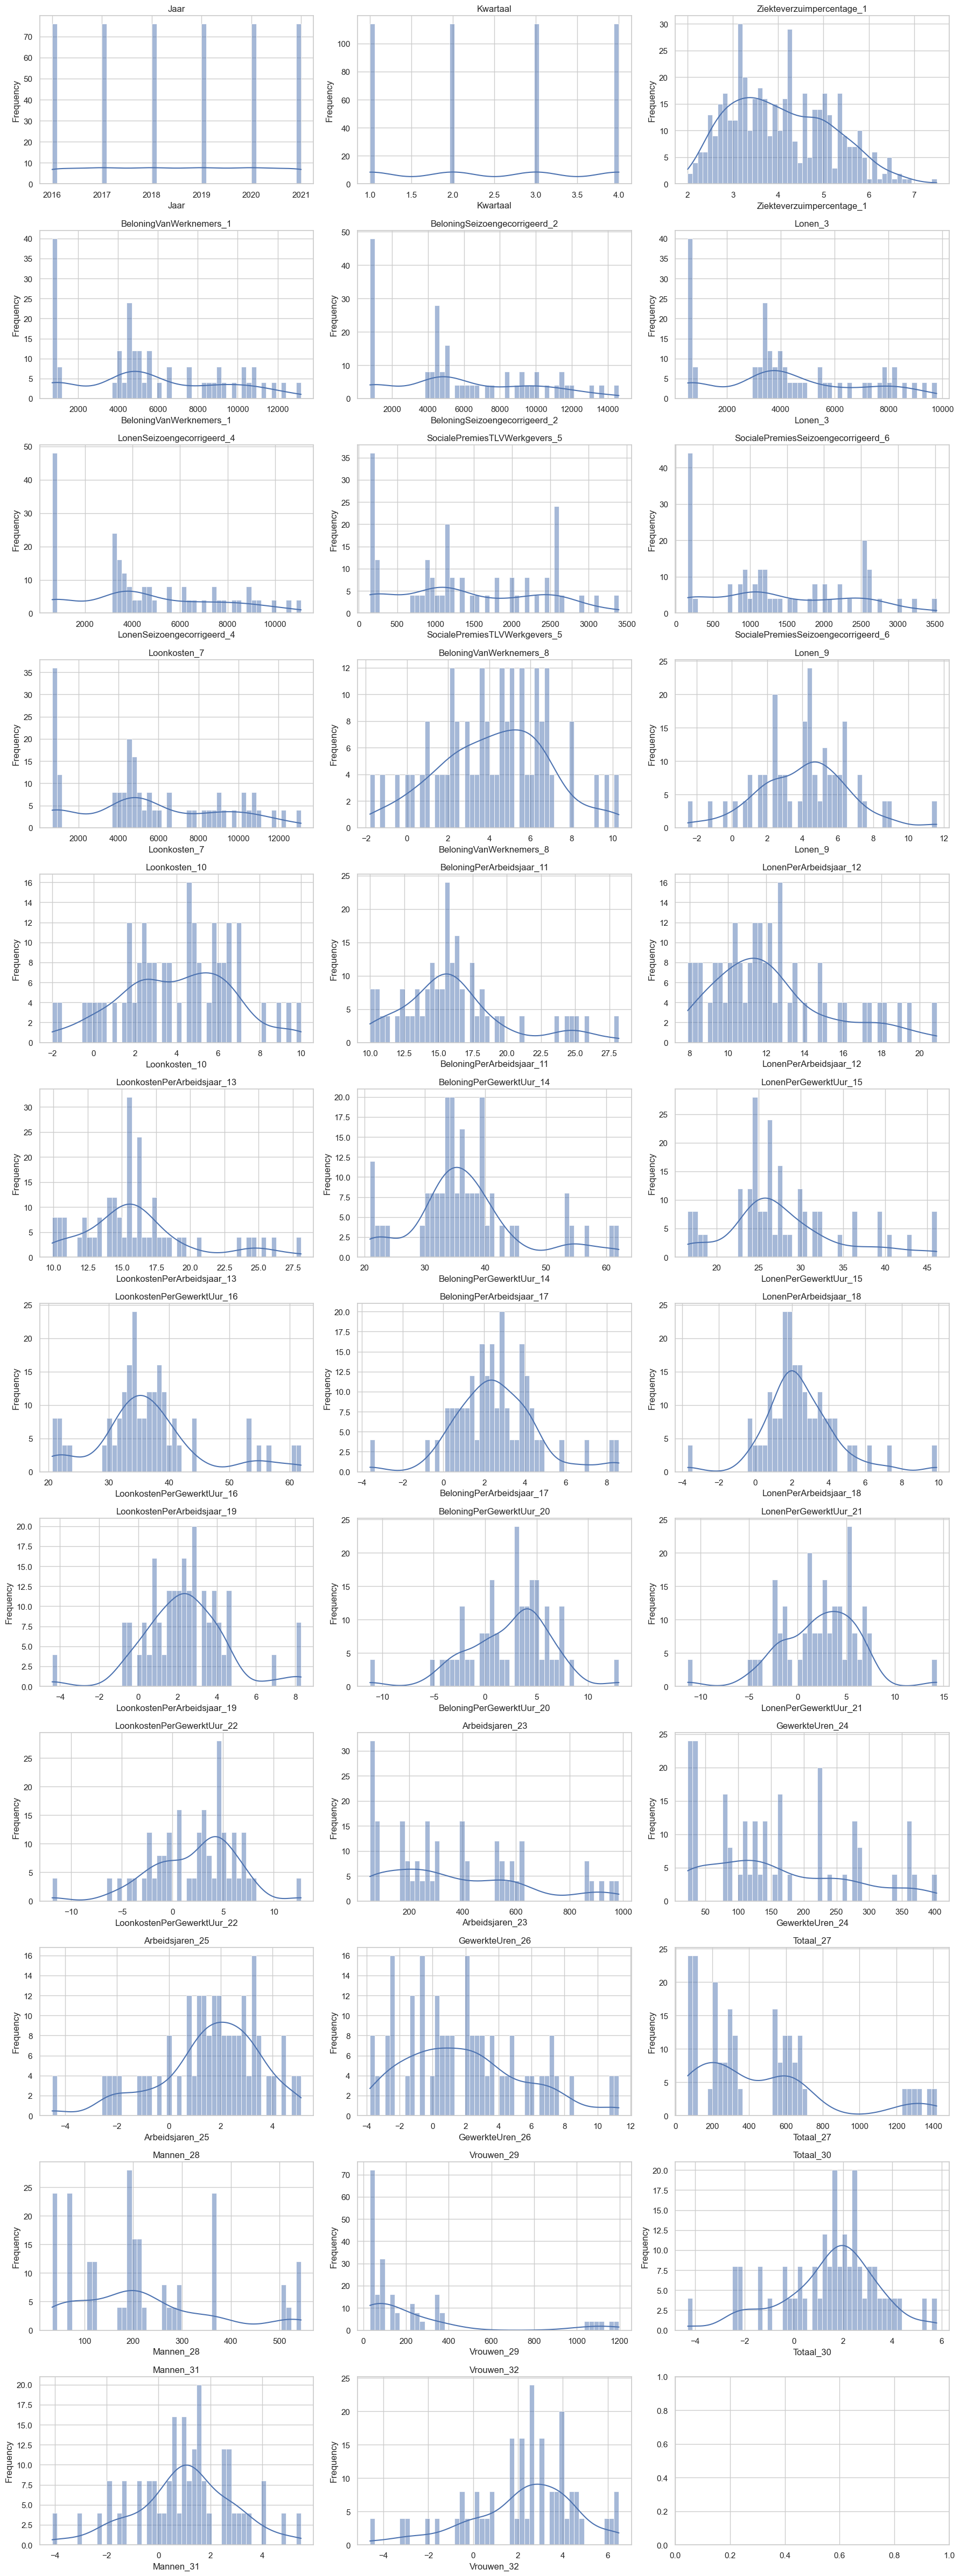

In [242]:
# Calculate number of rows and columns for subplots
num_cols = 3  # Number of columns in the grid
num_rows = (len(df_num.columns) - 1) // num_cols + 1  # Number of rows needed

# Set up the figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Plot each numeric column
for i, col in enumerate(df_num.columns):
    ax = axes[i]
    sns.histplot(df_num[col], bins=50, kde=True, ax=ax)
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

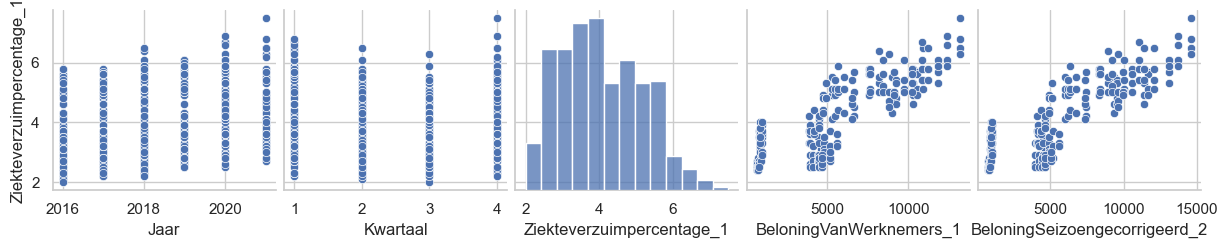

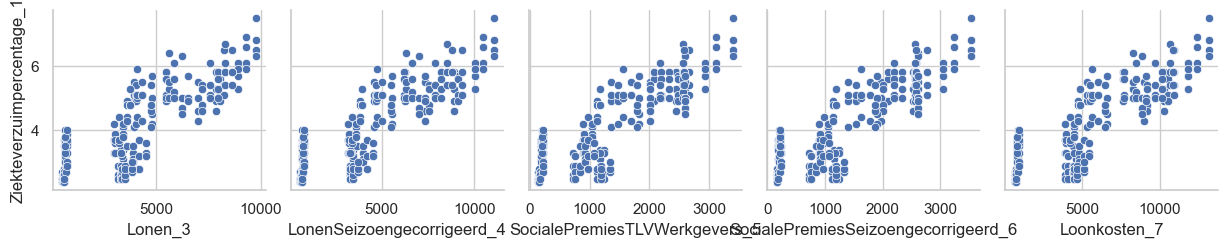

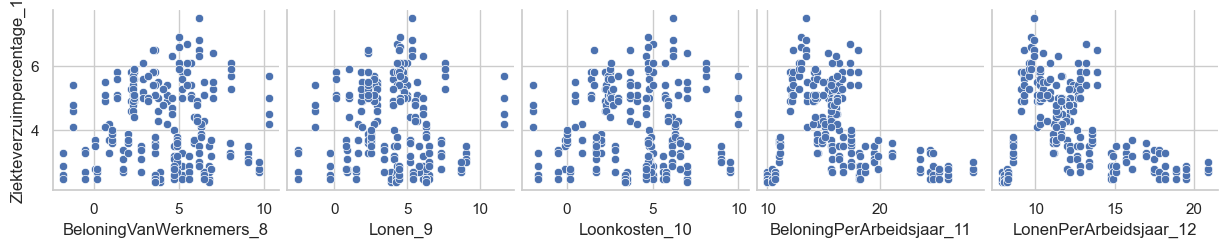

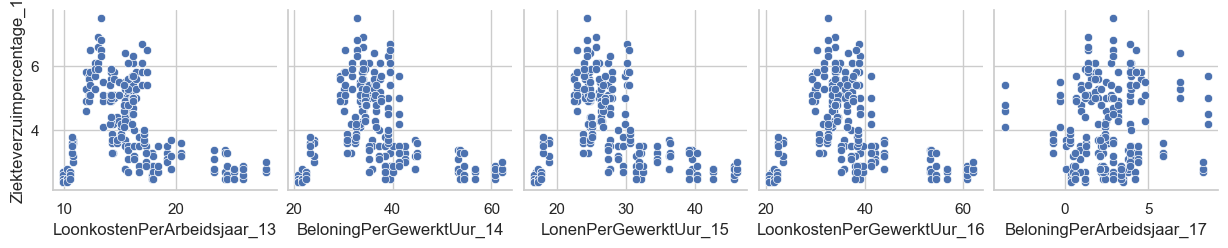

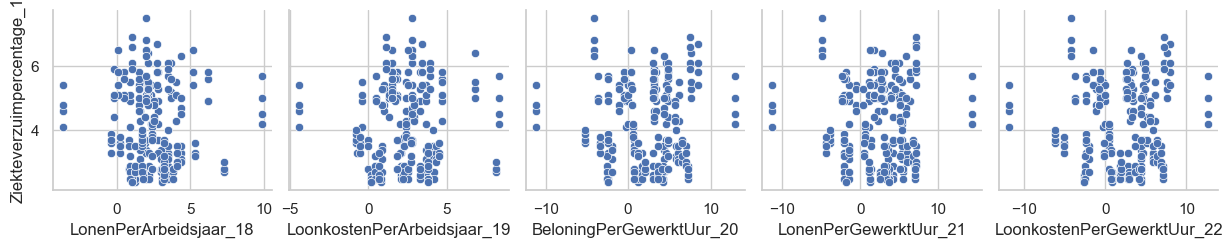

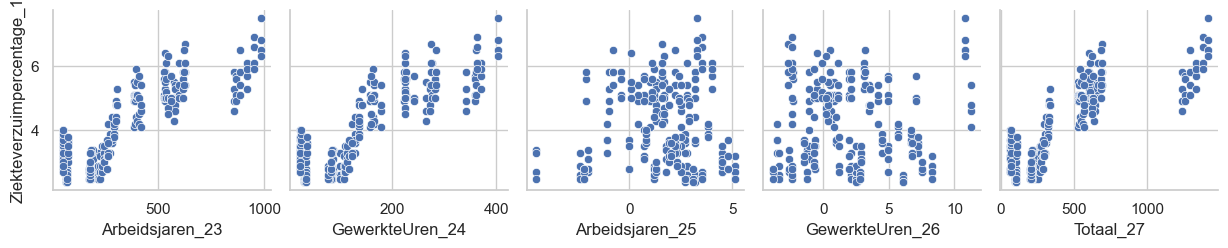

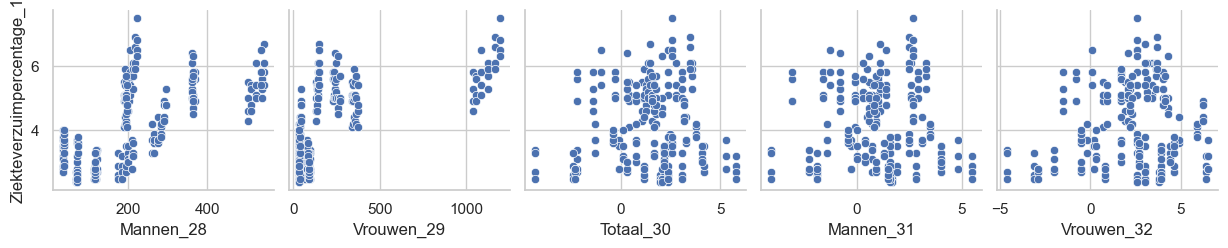

In [243]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['Ziekteverzuimpercentage_1'])

## Correlation

In [244]:
df_num_corr = df_num.corr()['Ziekteverzuimpercentage_1']
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with ziekteverzuim:\n{}".format(len(golden_features_list), golden_features_list))

There is 13 strongly correlated values with ziekteverzuim:
Ziekteverzuimpercentage_1              1.000000
Arbeidsjaren_23                        0.850892
GewerkteUren_24                        0.850449
SocialePremiesSeizoengecorrigeerd_6    0.848161
SocialePremiesTLVWerkgevers_5          0.844564
                                         ...   
BeloningVanWerknemers_1                0.819216
Totaal_27                              0.811317
Lonen_3                                0.802185
Mannen_28                              0.647449
Vrouwen_29                             0.628062
Name: Ziekteverzuimpercentage_1, Length: 13, dtype: float64


In [245]:
print(golden_features_list)

Ziekteverzuimpercentage_1              1.000000
Arbeidsjaren_23                        0.850892
GewerkteUren_24                        0.850449
SocialePremiesSeizoengecorrigeerd_6    0.848161
SocialePremiesTLVWerkgevers_5          0.844564
                                         ...   
BeloningVanWerknemers_1                0.819216
Totaal_27                              0.811317
Lonen_3                                0.802185
Mannen_28                              0.647449
Vrouwen_29                             0.628062
Name: Ziekteverzuimpercentage_1, Length: 13, dtype: float64


In [246]:
# Access the index (column names) from the Series
column_names = golden_features_list.index.tolist()
print(column_names)

additional_columns = ['Jaar', 'Kwartaal', 'BedrijfskenmerkenSBI2008']

all_columns = column_names + additional_columns

df_filtered = df[all_columns]
df_filtered.head()

['Ziekteverzuimpercentage_1', 'Arbeidsjaren_23', 'GewerkteUren_24', 'SocialePremiesSeizoengecorrigeerd_6', 'SocialePremiesTLVWerkgevers_5', 'BeloningSeizoengecorrigeerd_2', 'LonenSeizoengecorrigeerd_4', 'Loonkosten_7', 'BeloningVanWerknemers_1', 'Totaal_27', 'Lonen_3', 'Mannen_28', 'Vrouwen_29']


,Ziekteverzuimpercentage_1,Arbeidsjaren_23,GewerkteUren_24,SocialePremiesSeizoengecorrigeerd_6,SocialePremiesTLVWerkgevers_5,...,Mannen_28,Vrouwen_29,Jaar,Kwartaal,BedrijfskenmerkenSBI2008
0,2.7,69.0,32.0,159.0,145.0,...,67.0,33.0,2016,1,"A Landbouw, bosbouw en visserij"
1,3.6,NaN,NaN,NaN,NaN,...,NaN,NaN,2016,1,B Delfstoffenwinning
2,5.5,575.0,265.0,1978.0,2005.0,...,504.0,132.0,2016,1,C Industrie
3,4.9,NaN,NaN,NaN,NaN,...,NaN,NaN,2016,1,D Energievoorziening
4,5.5,NaN,NaN,NaN,NaN,...,NaN,NaN,2016,1,E Waterbedrijven en afvalbeheer


In [247]:
df_final = df_filtered.dropna()
print(df_final.shape)
df_final.head()

(216, 16)


,Ziekteverzuimpercentage_1,Arbeidsjaren_23,GewerkteUren_24,SocialePremiesSeizoengecorrigeerd_6,SocialePremiesTLVWerkgevers_5,...,Mannen_28,Vrouwen_29,Jaar,Kwartaal,BedrijfskenmerkenSBI2008
0,2.7,69.0,32.0,159.0,145.0,...,67.0,33.0,2016,1,"A Landbouw, bosbouw en visserij"
2,5.5,575.0,265.0,1978.0,2005.0,...,504.0,132.0,2016,1,C Industrie
5,4.2,269.0,123.0,893.0,893.0,...,259.0,34.0,2016,1,F Bouwnijverheid
9,3.3,218.0,100.0,722.0,727.0,...,175.0,66.0,2016,1,J Informatie en communicatie
10,3.4,196.0,87.0,1162.0,1177.0,...,122.0,98.0,2016,1,K Financiële dienstverlening


In [248]:
df_final.to_json('data/df_final.json')